In [2]:
import pandas as pd
from fuzzywuzzy import fuzz, process
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
%%HTML
<style>.dataframe th, td:first-child{background:#3f577c;font-family:monospace;color:white;border:3px solid white;
text-align:left !important;}#codex{float:right;}</style>

In [24]:
scraped_data = pd.read_csv('../Datasets/scraped_Car_versions.csv')
data = pd.read_csv('../Datasets/Data_cars.csv')

In [26]:
data.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [28]:
data['modele'] = data['Description'].str.extract(r'(\bmodele\: \b.*?,)', expand=True) 
data['modele'] = data['modele'].str.replace("modele: ", "")
data['modele'] = data['modele'].str.replace(",", "")

data['version'] = data['Description'].str.extract(r'(\bversion\b.*?,)', expand=True)       
data['version'] = data['version'].str.replace("version: ", "")
data['version'] = data['version'].str.replace(",", "")

data['puissance_fiscale'] = data['Description'].str.extract(r'(\bpuissance_fiscale\: \b.*?,)', expand=True)       
data['puissance_fiscale'] = data['puissance_fiscale'].str.replace("puissance_fiscale: ", "")
data['puissance_fiscale'] = data['puissance_fiscale'].str.replace(",", "")

data['portes'] = data['Description'].str.extract(r'(\bportes\: \b.*?,)', expand=True)       
data['portes'] = data['portes'].str.replace("portes: ", "")
data['portes'] = data['portes'].str.replace(",", "")

data['couleur'] = data['Description'].str.extract(r'(\bcouleur\: \b.*?$)', expand=True)       
data['couleur'] = data['couleur'].str.replace("couleur: ", "")
data['couleur'] = data['couleur'].str.upper()

data['options'] = data['Description'].str.extract(r'(\boptions\b.*, couleur)', expand=True)       
data['options'] = data['options'].str.replace("options: ", "")
data['options'] = data['options'].str.replace(", couleur", "")

In [32]:
data_version = data[['Make', 'modele', 'version']]
data_version.head()

,Make,modele,version
0,PEUGEOT,308 (2E GENERATION),1.6 HDI FAP 92CH BUSINESS 5P
1,BMW,X6 F16,(F16) XDRIVE30D 258 M SPORT BVA8
2,AUDI,RS6 (3E GENERATION) AVANT,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC
3,FORD,KA,1.3 70 FUN
4,FIAT,TIPO 2 SW,II SW 1.4 95 POP


In [33]:
scraped_data_version= scraped_data[['brand', 'model_gamme', 'model', 'version_name']]
scraped_data_version.head()

,brand,model_gamme,model,version_name
0,abarth,abarth 124,abarth 124,II 1.4 TURBO 170
1,abarth,abarth 124,abarth 124,II 1.4 TURBO 170 GT
2,abarth,abarth 124,abarth 124,II 1.4 TURBO 170 GT BVA
3,abarth,abarth 124,abarth 124,II 1.4 TURBO 170 TURISMO
4,abarth,abarth 124,abarth 124,II 1.4 TURBO 170 TURISMO BVA


In [34]:
scraped_data_version.shape, data_version.shape

((139047, 4), (166695, 3))

In [52]:
scraped_data_version.loc[scraped_data_version['version_name']=="II SW 1.4 95 POP"]

,brand,model_gamme,model,version_name
104444,fiat,fiat tipo,fiat tipo 2 sw commerciale,II SW 1.4 95 POP
104545,fiat,fiat tipo,fiat tipo 2 sw,II SW 1.4 95 POP


In [54]:
data_version.loc[data_version['version']=="II SW 1.4 95 POP"]

,Make,modele,version
4,FIAT,TIPO 2 SW,II SW 1.4 95 POP


In [55]:
process.extractOne("II SW 1.4 95 POP", scraped_data_version['version_name'].tolist())

('II SW 1.4 95 POP', 100)

In [47]:
scraped_data.iloc[[91683]]

,Unnamed: 0,brand,time,model_gamme,model,year,version_name,prix,equips_all,options,...,Caracteristiques_moteur,Caractéristiques_moteurN_1,Caractéristiques_moteurN_2,Couple_cumule,Direction,Duree_ charge,Location_ batterie,Nombre_moteurs,Position,Type_batterie
91683,91683,bmw,aujourdhui,bmw x6,bmw x6 f16,2015,(F16) XDRIVE30D 258 M SPORT BVA8,85000,"[{'Equipements de sécurité': ['6 airbags', 'ES...","[{'Accès Confort': '1 200 €'}, {'Affichage têt...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


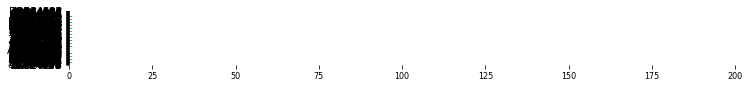

In [17]:
ax = hr.employee_id.value_counts().sort_values() \
    .plot(kind='barh', 
          color=['tomato', 'c'], 
          figsize=(12,1), 
          width=0.3 )
plt.xlim(0,201), 
plt.xticks(fontsize=8), 
ax.set_frame_on(False), 
plt.grid(color='white', alpha=.4, axis='x') ;

In [18]:
it['username'] = it['email'].str.replace('@giantbabybibs.org', '')

In [19]:
it

,email,username
0,l.kane@giantbabybibs.org,l.kane
1,catkison@giantbabybibs.org,catkison
2,t.raney@giantbabybibs.org,t.raney
3,tmichael@giantbabybibs.org,tmichael
4,c.foard@giantbabybibs.org,c.foard
...,...,...
195,d.stansel@giantbabybibs.org,d.stansel
196,a.kyler@giantbabybibs.org,a.kyler
197,a.milling@giantbabybibs.org,a.milling
198,k.heit@giantbabybibs.org,k.heit


In [69]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def ngrams(string, n=3):
    #string = fix_text(string) # fix text encoding issues
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower() #make lower case
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string) #remove the list of chars defined above
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single space
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [70]:
org_names = scraped_data_version['version_name'].unique()
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(org_names)

In [72]:
tf_idf_matrix.shape

(134359, 8900)

In [74]:
names =  pd.read_csv('../testingdata/messy org names.csv',encoding='latin')
print('The shape: %d x %d' % names.shape)
print('There are %d unique values' % names.buyer.shape[0])


The shape: 3651 x 3
There are 3651 unique values


In [75]:
names

,Unnamed: 0,buyer,count
0,0,Crescent Purchasing Consortium (CPC),4404
1,1,Crown Commercial Service,3683
2,2,UK SHARED BUSINESS SERVICES LIMITED,2467
3,3,Leeds City Council,2320
4,4,FCO SERVICES,2310
...,...,...,...
3646,3646,Sir Henry Floyd Grammer School,1
3647,3647,"Ministry of Defence, ISTAR, Air Defence & Elec...",1
3648,3648,Northern Inclusion Consortium/Groundwork,1
3649,3649,Chigwell Parish Council,1


In [77]:
import re
!pip install ftfy # amazing text cleaning for decode issues..
from ftfy import fix_text

import numpy as np
from scipy.sparse import csr_matrix
#!pip install sparse_dot_topn #uncomment to install
import sparse_dot_topn.sparse_dot_topn as ct

from sklearn.feature_extraction.text import TfidfVectorizer



import time


def ngrams(string, n=3):
    string = fix_text(string) # fix text
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower()
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

print('All 3-grams in "Department":')
print(ngrams('Department'))

All 3-grams in "Department":
[' De', 'Dep', 'epa', 'par', 'art', 'rtm', 'tme', 'men', 'ent', 'nt ']


In [119]:
def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape
 
    idx_dtype = np.int32
 
    nnz_max = M*ntop
 
    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)

    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)

    return csr_matrix((data,indices,indptr),shape=(M,N))

In [110]:
def get_matches_df(sparse_matrix, name_vector, top=100):
    non_zeros = sparse_matrix.nonzero()
    
    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]
    
    if top:
        nr_matches = top
    else:
        nr_matches = sparsecols.size
    
    left_side = np.empty([nr_matches], dtype=object)
    right_side = np.empty([nr_matches], dtype=object)
    similairity = np.zeros(nr_matches)
    
    for index in range(0, nr_matches):
        left_side[index] = name_vector[sparserows[index]]
        right_side[index] = name_vector[sparsecols[index]]
        similairity[index] = sparse_matrix.data[index]
    
    return pd.DataFrame({'left_side': left_side,
                          'right_side': right_side,
                           'similairity': similairity})

In [112]:
org_names = names['buyer'].unique()
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(org_names)

In [120]:
matches = awesome_cossim_top(tf_idf_matrix, tf_idf_matrix.transpose(), 10, 0.85)

In [122]:
'Ministry of Justice'
matches_df = get_matches_df(matches, org_names, top=1000)
matches_df = matches_df[matches_df['similairity'] < 0.99999] # Remove all exact matches
matches_df

IndexError: index 398 is out of bounds for axis 0 with size 1

In [87]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

t1 = time.time()
print(process.extractOne('Ministry of Justice', org_names))
t = time.time()-t1
print("SELFTIMED:", t)
print("Estimated hours to complete for full dataset:", (t*len(org_names))/60/60)

('MINISTRY OF JUSTICE', 100)
SELFTIMED: 2.2605910301208496
Estimated hours to complete for full dataset: 2.2926160697142284


In [102]:
test = np.array(["Ministry of Justice"])
test_metrix = vectorizer.fit_transform(org_names)

test_match = awesome_cossim_top(test_metrix, tf_idf_matrix.transpose(), 10, 0.85)

In [106]:
print(matches.shape)

(3651, 3651)


In [ ]:
##################
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re

clean_org_names = pd.read_excel('Gov Orgs ONS.xlsx')
clean_org_names = clean_org_names.iloc[:, 0:6]

org_name_clean = clean_org_names['Institutions'].unique()

print('Vecorizing the data - this could take a few minutes for large datasets...')
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams, lowercase=False)
tfidf = vectorizer.fit_transform(org_name_clean)
print('Vecorizing completed...')

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)

org_column = 'buyer' #column to match against in the messy data
unique_org = set(names[org_column].values) # set used for increased performance


###matching query:
def getNearestN(query):
  queryTFIDF_ = vectorizer.transform(query)
  distances, indices = nbrs.kneighbors(queryTFIDF_)
  return distances, indices

import time
t1 = time.time()
print('getting nearest n...')
distances, indices = getNearestN(unique_org)
t = time.time()-t1
print("COMPLETED IN:", t)

unique_org = list(unique_org) #need to convert back to a list
print('finding matches...')
matches = []
for i,j in enumerate(indices):
  temp = [round(distances[i][0],2), clean_org_names.values[j][0][0],unique_org[i]]
  matches.append(temp)

print('Building data frame...')  
matches = pd.DataFrame(matches, columns=['Match confidence (lower is better)','Matched name','Origional name'])
print('Done') 

In [125]:
makes = data['Make'].unique()

In [126]:
len(makes)

92

In [133]:
scraped_data_makes = scraped_data.loc[scraped_data['brand'].str.upper().isin(makes)]

In [134]:
scraped_data_makes.shape

(127387, 64)

In [3]:
data = pd.read_csv('../Datasets/Data_cars.csv')

In [5]:
data['version'] = data['Description'].str.extract(r'(\bversion\b.*?,)', expand=True)       
data['version'] = data['version'].str.replace("version: ", "")
data['version'] = data['version'].str.replace(",", "")
data['make_model_version'] = data['Make'] + " " + data['Model'] + " " + data['version']

In [7]:
data['make_model_version'].shape

(166695,)

In [9]:
len(set(data['make_model_version']))

32662

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import re

#!pip install ftfy # amazing text cleaning for decode issues..
from ftfy import fix_text

#pd.set_option('max_colwidth', 10000)

In [17]:
datasets_path = r'../Datasets/'
scraped_data = pd.read_csv(datasets_path+'scraped_Car_versions.csv')
data = pd.read_csv(datasets_path+'Data_cars.csv')

/anaconda3/envs/Mask_RCNN_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (54,55,56,57,58,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
data['version'] = data['Description'].str.extract(r'(\bversion\b.*?,)', expand=True)       
data['version'] = data['version'].str.replace("version: ", "")
data['version'] = data['version'].str.replace(",", "")

data['make_model_version'] = data['Make'] + " " + data['Model'] + " " + data['version']

scraped_data['model_version'] = scraped_data['model'] + " " +scraped_data['version_name']

# Suppression des modèles qui n'existent pas dans le dataframe 'data' (afin de réduire la taille du 'scraped_data')
makes = data['Make'].unique()
scraped_data_makes = scraped_data.loc[scraped_data['brand'].str.upper().isin(makes)]

In [11]:
def ngrams(string, n=3):
    string = fix_text(string) # fix text
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower()
    chars_to_remove = ["|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

###matching query:
def getNearestN(query):
    queryTFIDF_ = vectorizer.transform(query)
    distances, indices = nbrs.kneighbors(queryTFIDF_)
    return distances, indices

In [19]:
# Vecorisation des données 
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams, lowercase=False)
model_version_scraping = scraped_data_makes['model_version'].unique()
#org_names = data_test['make_model_version'].unique()
tfidf = vectorizer.fit_transform(model_version_scraping)

nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)

In [20]:
data_test = data.head(100)

In [37]:
unique_org = data['make_model_version'].values # colone à matcher avec 'model_version' du 'scraped_data'

In [38]:
# réalisation du neast N
import time
t1 = time.time()
distances, indices = getNearestN(unique_org)
t = time.time()-t1
print("COMPLETED IN:", t)


KeyboardInterrupt: 

In [39]:


# recherche des matches
matches = []
t1 = time.time()

for i,j in enumerate(indices):
    print('i='+str(i))
    temp = [round(distances[i][0],2), scraped_data_makes.values[j][0][64],unique_org[i]]
    matches.append(temp)
t = time.time()-t1
print("COMPLETED IN:", t)
# Construction du dataframe des matches 
matches = pd.DataFrame(matches, columns=['Match confidence (lower is better)','scraped_version','Origional_data'])

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
COMPLETED IN: 19.291253089904785


In [34]:
matches

,Match confidence (lower is better),scraped_version,Origional_data
0,0.76,peugeot 308 1.6 HDI 92 BUSINESS 5P,PEUGEOT 308 1.6 HDI FAP 92CH BUSINESS 5P
1,0.33,bmw x6 f16 (F16) XDRIVE30D 258 M SPORT BVA8,BMW X6 (F16) XDRIVE30D 258 M SPORT BVA8
2,0.48,audi rs6 (3e generation) avant III AVANT 4.0 T...,AUDI RS6 III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC
3,0.00,ford ka 1.3 70 FUN,FORD KA 1.3 70 FUN
4,0.46,fiat tipo 2 sw II SW 1.4 95 POP,FIAT TIPO II SW 1.4 95 POP
...,...,...,...
95,0.00,bmw serie 3 gt (F34) 318D 143 LUXURY BVA8,BMW SERIE 3 GT (F34) 318D 143 LUXURY BVA8
96,0.00,peugeot 208 (2) 1.6 BLUEHDI 75 ACTIVE 5P,PEUGEOT 208 (2) 1.6 BLUEHDI 75 ACTIVE 5P
97,0.38,volkswagen polo 4 IV (2) 1.2 70 CONFORTLINE 5P,VOLKSWAGEN POLO IV (2) 1.2 70 CONFORTLINE 5P
98,0.31,renault twingo 3 III 1.0 SCE 70 INTENS EDC,RENAULT TWINGO III 1.0 SCE 70 INTENS EDC


In [29]:
data_test.shape

(100, 11)

In [36]:
len(matches['Origional_data'].unique())

96

In [41]:
import os
os.system( "say ayema taaboute louzarrr" )

0